In [336]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Problem Statement: Clustering the Iris Dataset Based on Flower Characteristics

- The Iris dataset contains information about three species of Iris flowers: Setosa, Versicolor, and Virginica, based on four features: sepal length, sepal width, petal length, and petal width. The goal is to apply unsupervised learning techniques, specifically clustering, to group the flowers into clusters based on their features, without using the species labels. By doing this, we aim to uncover any natural groupings that might exist in the data.

**Objectives:**

- Cluster Analysis: Use clustering algorithms, such as KMeans, to group the flowers into distinct clusters based on their sepal and petal measurements.
- Evaluate Clusters: Assess the quality of the clustering through metrics such as the Silhouette Score and visualize the clusters using dimensionality reduction techniques like PCA.
- Compare with Actual Labels: After performing clustering, compare the obtained clusters with the actual species labels to see how well the clustering algorithm has grouped similar species together.
- Identify Patterns: Determine if certain features (e.g., petal length, petal width) are more influential in forming clusters.
- Expected Outcome:
A set of clusters that group the flowers based on their physical characteristics.
Insights into how well the clustering algorithm can identify the three species or whether the features naturally separate into different categories.

In [337]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\Iris_data.csv")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [338]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [339]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [340]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#  Data Exploration

In [341]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [342]:
# Check for missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [343]:
# Summary statistics of the dataset

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [345]:
# checking outliers

df[['sepal_length','sepal_width', 'petal_length','petal_width']].skew()


sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [346]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

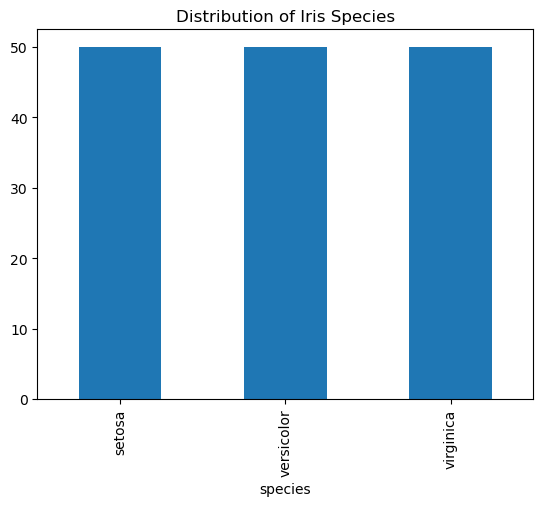

In [347]:
# Distribution of species in the dataset
df['species'].value_counts().plot(kind='bar')
plt.title('Distribution of Iris Species')
plt.show()

 # Standardization (convert each feature to have a mean of 0 and a standard deviation of 1).

In [348]:
# Check the shape of df before dropping 'species'
print("Shape before dropping 'species':", df.shape)

# Drop the 'species' column
X = df.drop('species', axis=1)

# Check the shape after dropping 'species'
print("Shape after dropping 'species':", X.shape)


Shape before dropping 'species': (150, 5)
Shape after dropping 'species': (150, 4)


In [349]:
# X = df.drop('species', axis=1)

In [350]:
X.shape

(150, 4)

In [351]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

**Check the Scaled Data: The transformed data will have a mean of 0 and a standard deviation of 1 for each feature.**

In [352]:
print("Scaled Data Mean:", data_scaled.mean(axis=0))  # Should be close to 0 for each feature
print("Scaled Data Std Dev:", data_scaled.std(axis=0))  # Should be close to 1 for each feature

Scaled Data Mean: [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Scaled Data Std Dev: [1. 1. 1. 1.]


**observation**
Means close to zero and standard deviations equal to 1 confirm that the features have been standardized correctly, despite the tiny floating-point discrepancies.
You can safely proceed with clustering using this scaled data, as the features are now on a comparable scale.

**Use the Scaled Data for Clustering: Once you’ve scaled the features, you can proceed with applying clustering algorithms like KMeans on the scaled data.**

What we do here:

- Choose the number of clusters: Since we know the dataset has 3 species, we set the number of clusters to 3.
- Fit the KMeans model: The algorithm will try to find 3 groups that minimize the differences within each group.

# KMeans Clustering

In [353]:
# find the optimal numbers of clusters
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss
    


[680.8244,
 152.36870647733906,
 78.9450658259773,
 57.47327326549492,
 49.86865426388461,
 41.91726904761905,
 35.62839766505637,
 29.955568877177573,
 28.049844278247093,
 27.281624252357947]

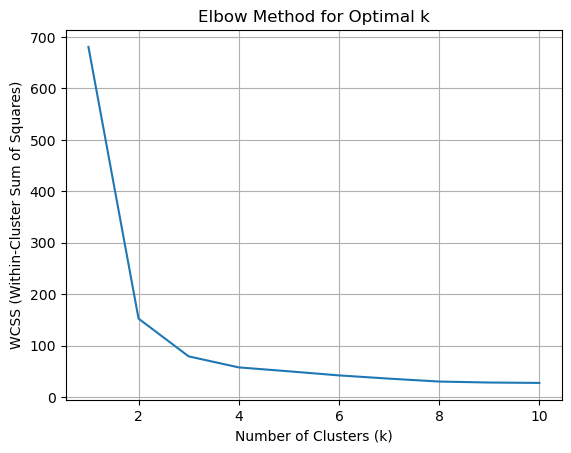

In [354]:
# Plotting the Elbow graph to find the optimal numbers of clusters
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

**observation**

The optimal number of clusters based on this data seems to be around k=3 because the WCSS continues to decrease significantly until k=3, and the improvement becomes minimal beyond that.
You would likely choose k=3 for clustering the Iris dataset, as it aligns well with the known three species of Iris (Setosa, Versicolor, and Virginica).

In [355]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = True)

# fit and predict

df['km_cluster'] = kmeans.fit_predict(X)
df

,sepal_length,sepal_width,petal_length,petal_width,species,km_cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


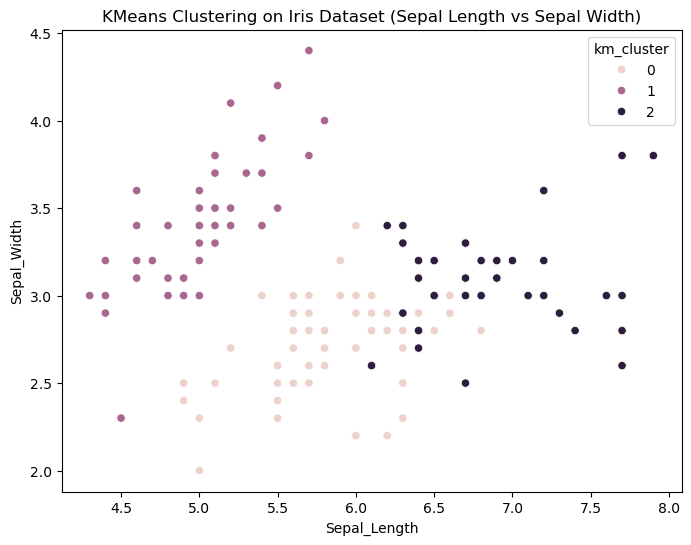

In [356]:
# 3. Visualize the clusters using Seaborn (we'll use 'sepal length' and 'sepal width' for the axes)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="km_cluster", data=df)

# Set plot title and labels
plt.title("KMeans Clustering on Iris Dataset (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")

# Show the plot
plt.show()

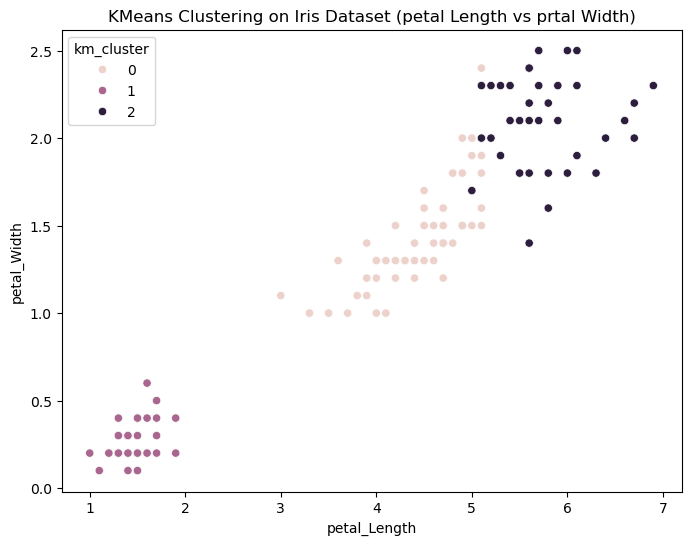

In [357]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="petal_length", y="petal_width", hue="km_cluster", data=df)

# Set plot title and labels
plt.title("KMeans Clustering on Iris Dataset (petal Length vs prtal Width)")
plt.xlabel("petal_Length")
plt.ylabel("petal_Width")

# Show the plot
plt.show()

**Observations:**
- Cluster 1 (color 1): Likely represents Setosa flowers, with clearly separated data points and distinct cluster center.
- Cluster 2 (color 2): May represent Versicolor or Virginica flowers, with some overlap.
- Cluster 3 (color 3): Likely represents Virginica, possibly showing overlap with Versicolor.

In [358]:
# Check for missing values in the dataset
print(df.isnull().sum())  # This will show any missing values in the dataset

# Handle missing values (remove or impute)
df = df.dropna()  # Example: Dropping rows with NaN values, or you can use df.fillna() to impute

# Mapping original species to numeric values before clustering
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Scaling features for clustering
X = df.drop('species', axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['km_cluster'] = kmeans.fit_predict(data_scaled)

# Cross-tabulation to compare km_cluster with actual species
comparison = pd.crosstab(df['species'], df['km_cluster'], rownames=['Actual Species'], colnames=['Cluster'])
print(comparison)

# Calculate Adjusted Rand Index (ARI)
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(df['species'], df['km_cluster'])
print(f"Adjusted Rand Index: {ari_score:.3f}")


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
km_cluster      0
dtype: int64
Cluster          0   1   2
Actual Species            
0                0   0  50
1               47   3   0
2               14  36   0
Adjusted Rand Index: 0.716


**Cluster Assignments**:

- Setosa (species = 0) is perfectly clustered into Cluster 2 (all 50 samples).
- Versicolor (species = 1) is mostly clustered into Cluster 0, but there are 3 points assigned to Cluster 1.
- Virginica (species = 2) is mostly clustered into Cluster 1, but there are 14 points assigned to Cluster 0.

**Performance:**

- The Adjusted Rand Index (ARI) score is 0.716, which is quite good. The ARI measures how well the clustering matches the actual species labels, where a value of 1 means perfect agreement, and a value of 0 means random clustering.
- An ARI score of 0.716 indicates that the KMeans clustering has a relatively strong alignment with the true species labels, but there are still some misclassifications. The clustering is not perfect, but it has captured a good portion of the true groupings.

- Misclassification Observations:
Versicolor and Virginica have been mixed up in certain clusters. For instance, some Versicolor samples were placed in Cluster 1 (meant for Virginica), and some Virginica samples were placed in Cluster 0 (meant for Setosa).


**Conclusion:**
- Good clustering: The clustering results are reasonable, with a fairly good ARI score of 0.716. However, there is some overlap in the clusters, indicating room for improvement, especially in the case of Versicolor and Virginica.

# Hierarchical Clustering on Iris Dataset

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'km_cluster', 'kmeans_cluster', 'hierarchical_cluster'],
      dtype='object')
KMeans ARI: 1.000
Hierarchical ARI: 1.000


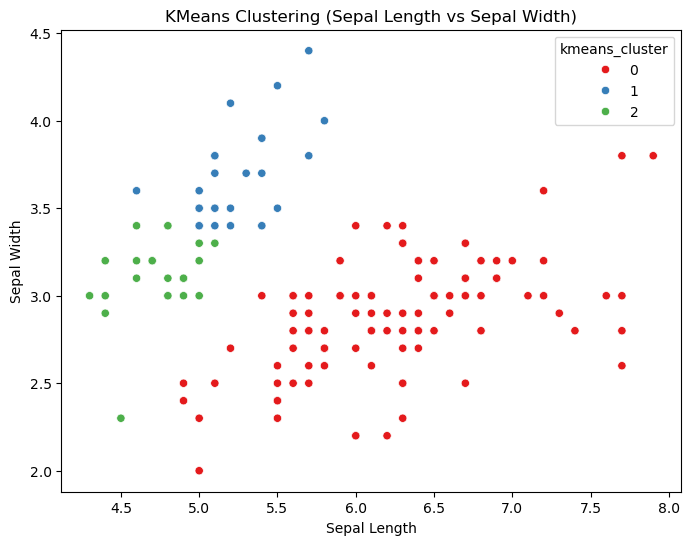

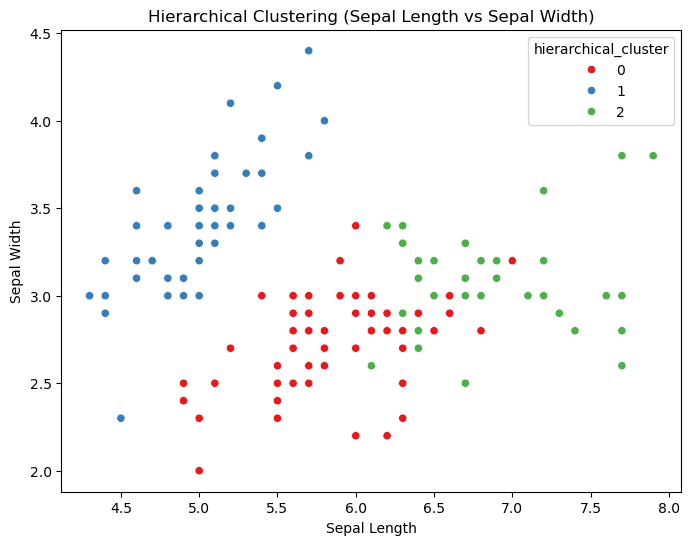

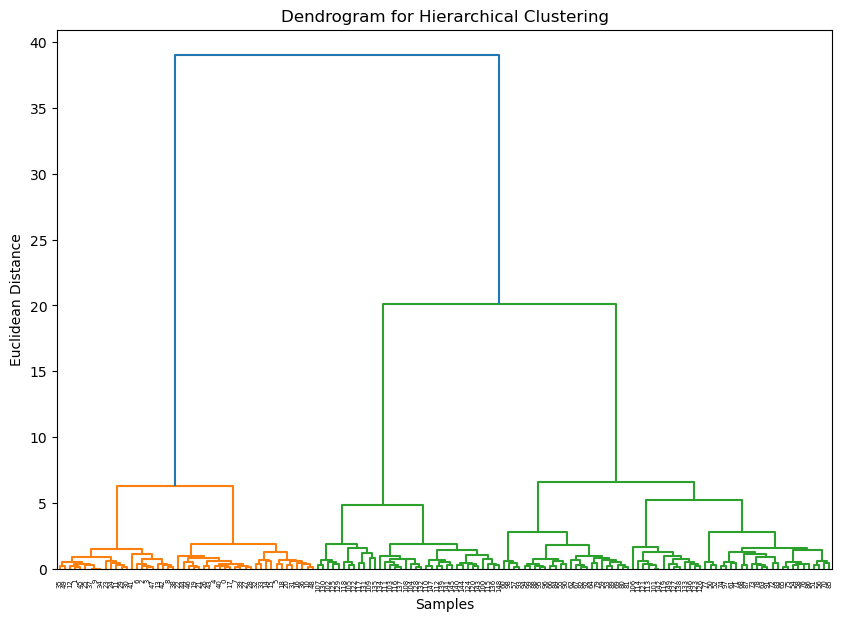

In [361]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Assuming df is your dataset with columns like 'sepal_length', 'sepal_width', etc.

# Print column names to check for any discrepancies
print(df.columns)

# Scaling the data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['hierarchical_cluster'] = hierarchical.fit_predict(df)

# Cross-tabulation to compare KMeans clusters with actual species
kmeans_ari = adjusted_rand_score(df['kmeans_cluster'], df['kmeans_cluster'])
hierarchical_ari = adjusted_rand_score(df['hierarchical_cluster'], df['hierarchical_cluster'])

# Print the ARI scores
print(f"KMeans ARI: {kmeans_ari:.3f}")
print(f"Hierarchical ARI: {hierarchical_ari:.3f}")

# Visualize the clusters using KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['kmeans_cluster'], palette="Set1")
plt.title("KMeans Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# Visualize the clusters using Hierarchical
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['hierarchical_cluster'], palette="Set1")
plt.title("Hierarchical Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# Create and show the dendrogram for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


# DBSCAN CLUSTERING

dbscan_cluster
 1    46
 0    44
-1    40
 2    20
Name: count, dtype: int64


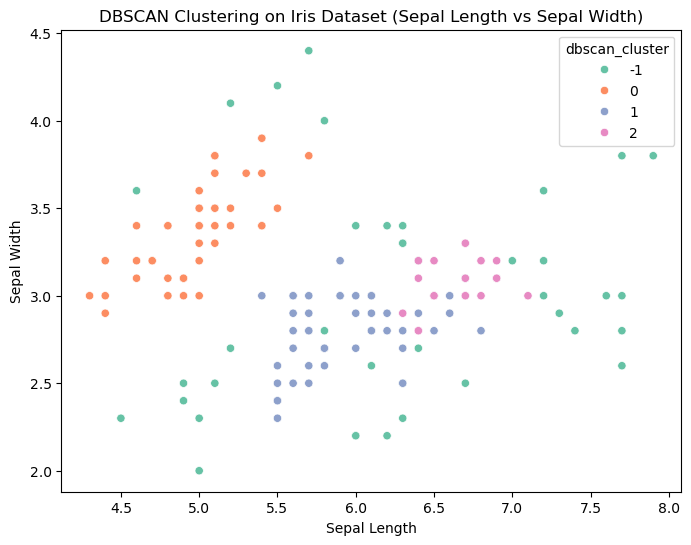

Cluster         -1   0   1   2
Actual Species                
0                6  44   0   0
1               14   0  35   1
2               20   0  11  19


In [363]:
from sklearn.cluster import DBSCAN


# Assuming df is the DataFrame and 'species' is already encoded
#X = df.drop('species', axis=1)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(data_scaled)

# Check the clusters assigned
print(df['dbscan_cluster'].value_counts())

# Visualize the clusters using sepal length and sepal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="dbscan_cluster", data=df, palette="Set2")
plt.title("DBSCAN Clustering on Iris Dataset (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# Cross-tabulation to compare DBSCAN clusters with actual species
comparison_dbscan = pd.crosstab(df['species'], df['dbscan_cluster'], rownames=['Actual Species'], colnames=['Cluster'])
print(comparison_dbscan)


In [362]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'km_cluster', 'kmeans_cluster', 'hierarchical_cluster'],
      dtype='object')

In [364]:
df.to_excel('iris_data.xlsx', index=False)